# This notebook compares the outputs from VESIcal to the Shishkina et al. (2014) Calibration dataset. 
- This notebook relies on the Excel spreadsheet entitled: "S7_Testing_Shishkina_et_al_2014.xlsx"
- Test 1 compares the experimental pressures in the calibration dataset of Shishkina et al. (2014) for H$_2$O-only experiments to the saturation pressures obtained from VESIcal for the "ShishkinaWater" model. 
- Test 2 compares the experimental pressures in the calibration dataset of Shishkina et al. (2014) for CO$_2$-only experiments to the saturation pressures obtained from VESIcal for the "ShishkinaCarbon" model. 
- Test 3 compares the experimental pressures for mixed H$_2$O-CO$_2$ bearing fluids presented in Table 2 of the main text to the saturation pressures obtained from VESIcal for the "Shishkina" model.
- Test 4 justifies the approach used in VESIcal, where cation fractions for their equation 9 are calculated ignoring H$_2$O and CO$_2$


In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["legend.fontsize"]= 14


## Test 1 and 2 - comparing saturation pressures to experimental pressures

In [3]:
myfile_CO2 = v.BatchFile('S7_Testing_Shishkina_et_al_2014.xlsx', sheet_name='CO2') # Loading Carbon calibration dataset
satPs_wtemps_Shish_CO2= myfile_CO2.calculate_saturation_pressure(temperature="Temp", model='ShishkinaCarbon') # Calculating saturation pressures
myfile_H2O = v.BatchFile('S7_Testing_Shishkina_et_al_2014.xlsx', sheet_name='H2O') # Loading Water calibration dataset
satPs_wtemps_Shish_H2O= myfile_H2O.calculate_saturation_pressure(temperature="Temp", model='ShishkinaWater') # Calculating Saturation pressures

/opt/anaconda3/lib/python3.7/site-packages/VESIcal/calculate_classes.py:369: RuntimeWarning: Saturation pressure not found.
  **kwargs)


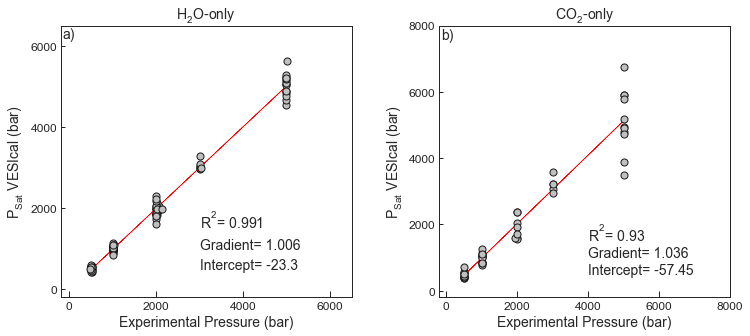

In [4]:
######################## H2O only experiments
# This calculating a linear regression, and plots experimental pressures vs. saturation pressures for the Water calibration dataset
X_Test1=satPs_wtemps_Shish_H2O['Press'] 
Y_Test1=satPs_wtemps_Shish_H2O['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1) # This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here

ax1.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(satPs_wtemps_Shish_H2O['Press'], satPs_wtemps_Shish_H2O['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 1))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 3)) 

ax1.text(3000, 1500, R, fontsize=14)
ax1.text(3000, 1000, G, fontsize=14)
ax1.text(3000, 500, I,  fontsize=14)

###################  CO2 experiments

X_Test2=satPs_wtemps_Shish_CO2['Press'] 
Y_Test2=satPs_wtemps_Shish_CO2['SaturationP_bars_VESIcal']
mask_Test2 = (X_Test2>-1) & (Y_Test2>-1) # This gets rid of Nans
X_Test2noNan=X_Test2[mask_Test2].values.reshape(-1, 1)
Y_Test2noNan=Y_Test2[mask_Test2].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test2noNan,Y_Test2noNan)
Y_pred_Test2=lr.predict(X_Test2noNan)
ax2.plot(X_Test2noNan,Y_pred_Test2, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax2.scatter(satPs_wtemps_Shish_CO2['Press'], satPs_wtemps_Shish_CO2['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test2noNan, Y_pred_Test2), 2)) 

ax2.text(4000, 500, I, fontsize=14)
ax2.text(4000, 1000, G, fontsize=14)
ax2.text(4000, 1500, R, fontsize=14)

ax1.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax2.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax2.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax1.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.set_yticks([0, 2000, 4000, 6000, 8000, 10000])
ax2.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax2.set_yticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.set_xlim([-200, 6500])
ax1.set_ylim([-200, 6500])
ax2.set_xlim([-200, 8000])
ax2.set_ylim([-200, 8000])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

ax1.text(-150, 6200, 'a)', fontsize=14)
ax2.text(-150, 7600, 'b)', fontsize=14)
ax1.set_title('H$_{2}$O-only',  fontsize=14)
ax2.set_title('CO$_2$-only',  fontsize=14)
fig.savefig('Shishkina_Test1and2.png', transparent=True)



## Test 3 - Mixed H$_2$O - CO$_2$ experiments from Table 2 in the text. 
- We show the regression for experimental pressure vs. saturation pressure calculated in VESIcal for all data, and data with experimental pressures <4000 bars (to remove the most scattered datapoints).

In [5]:
myfile_Comb = v.BatchFile('S7_Testing_Shishkina_et_al_2014.xlsx', sheet_name='Table2_Text') # Loads experimental data from Table 2
satPs_wtemps_Shish_Comb= myfile_Comb.calculate_saturation_pressure(temperature="Temp", model='ShishkinaIdealMixing') # Calculates saturation pressures for these compositions + tempts

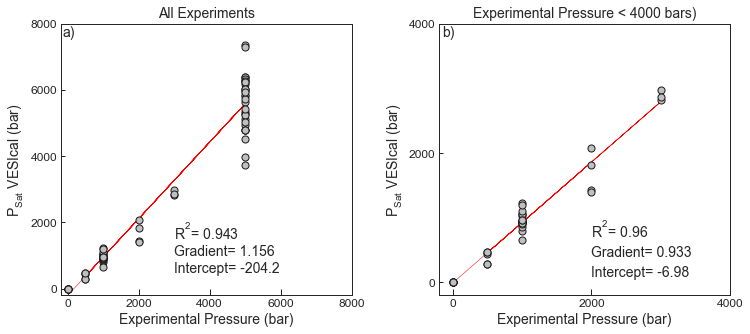

In [6]:
######################## H2O only experiments
X_Test3b=satPs_wtemps_Shish_Comb['Press'] 
Y_Test3b=satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal']
mask_Test3b = (X_Test3b>-1) & (Y_Test3b>-1) # This gets rid of Nans
X_Test3bnoNan=X_Test3b[mask_Test3b].values.reshape(-1, 1)
Y_Test3bnoNan=Y_Test3b[mask_Test3b].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test3bnoNan,Y_Test3bnoNan)
Y_pred_Test3b=lr.predict(X_Test3bnoNan)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here

ax1.plot(X_Test3bnoNan,Y_pred_Test3b, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(satPs_wtemps_Shish_Comb['Press'], satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 1))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test3bnoNan, Y_pred_Test3b), 3)) 

ax1.text(3000, 1500, R, fontsize=14)
ax1.text(3000, 1000, G, fontsize=14)
ax1.text(3000, 500, I,  fontsize=14)

###################  CO2 experiments

X_Test3=satPs_wtemps_Shish_Comb['Press'] 
Y_Test3=satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal']
mask_Test3 = (X_Test3>-1) & (Y_Test3>-1) &(X_Test3<4000) # This gets rid of Nans
X_Test3noNan=X_Test3[mask_Test3].values.reshape(-1, 1)
Y_Test3noNan=Y_Test3[mask_Test3].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test3noNan,Y_Test3noNan)
Y_pred_Test3=lr.predict(X_Test3noNan)
ax2.plot(X_Test3noNan,Y_pred_Test3, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax2.scatter(satPs_wtemps_Shish_Comb['Press'], satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test3noNan, Y_pred_Test3), 2)) 

ax2.text(2000, 100, I, fontsize=14)
ax2.text(2000, 400, G, fontsize=14)
ax2.text(2000, 700, R, fontsize=14)


ax1.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax2.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax2.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax1.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.set_yticks([0, 2000, 4000, 6000, 8000, 10000])
ax2.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax2.set_yticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.set_xlim([-200, 8000])
ax1.set_ylim([-200, 8000])
ax2.set_xlim([-200, 4000])
ax2.set_ylim([-200, 4000])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

ax1.text(-150, 7600, 'a)', fontsize=14)
ax2.text(-150, 3800, 'b)', fontsize=14)
ax1.set_title('All Experiments',  fontsize=14)
ax2.set_title('Experimental Pressure < 4000 bars)',  fontsize=14)

fig.savefig('Shishkina_Test3.png', transparent=True)



## Test 4 - Intepretation of "atomic fractions of cations in Equation 9.
- We can only recreate the chemical data for cation fractions shown in their Fig. 7a if the "atomic fractions of cations" are calculated excluding volatiles. Including atomic proportions including H$_2$O and CO$_2$ results in a significantly worse fit to experimental data for the ShishkinaWater model shown in test 2. The choice of normalization doesn't affect the results for the CO$_2$ model, where the compositional dependence is expressed as a fraction

In [7]:
# Removed CO2 and H2O
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5']
oxideMass = {'SiO2': 28.085+32, 'MgO': 24.305+16, 'FeO': 55.845+16, 'CaO': 40.078+16, 'Al2O3': 2*26.982+16*3, 'Na2O': 22.99*2+16,
			 'K2O': 39.098*2+16, 'MnO': 54.938+16, 'TiO2': 47.867+32, 'P2O5': 2*30.974+5*16, 'Cr2O3': 51.996*2+3*16,
			 'NiO': 58.693+16, 'CoO': 28.01+16, 'Fe2O3': 55.845*2+16*3}
CationNum = {'SiO2': 1, 'MgO': 1, 'FeO': 1, 'CaO': 1, 'Al2O3': 2, 'Na2O': 2,
			 'K2O': 2, 'MnO': 1, 'TiO2': 1, 'P2O5': 2, 'Cr2O3': 2,
			 'NiO': 1, 'CoO': 1, 'Fe2O3': 2}

In [8]:
Normdata = myfile_H2O.get_data(normalization="additionalvolatiles")

In [9]:
for ind,row in Normdata.iterrows():
    for ox in oxides:
        Normdata.loc[ind, ox + 'molar']=((row[ox]*CationNum[ox])/oxideMass[ox]) # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
        #oxide_molar[ind, ox]=ox+'molar'
    Normdata.loc[ind,'sum']=sum(Normdata.loc[ind, ox+'molar'] for ox in oxides)
    for ox in oxides:
        Normdata.loc[ind, ox + 'norm']=Normdata.loc[ind, ox+'molar']/Normdata.loc[ind, 'sum']
            # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
Normdata.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Cr2O3norm,FeOnorm,MnOnorm,MgOnorm,NiOnorm,CoOnorm,CaOnorm,Na2Onorm,K2Onorm,P2O5norm
1,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,...,0.0,0.072597,0.001334,0.096675,0.0,0.0,0.112861,0.041851,0.002718,0.001176
2,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,...,0.0,0.072597,0.001334,0.096675,0.0,0.0,0.112861,0.041851,0.002718,0.001176
3,46.237383,2.700445,14.656611,0.0,0.0,11.751120,0.164913,8.719756,0.0,0.0,...,0.0,0.090539,0.001287,0.119756,0.0,0.0,0.104996,0.062780,0.012477,0.004341
4,47.327420,2.353128,14.179890,0.0,0.0,10.825606,0.173174,10.370063,0.0,0.0,...,0.0,0.082744,0.001341,0.141287,0.0,0.0,0.097358,0.062455,0.009739,0.003626
5,43.666155,2.638655,12.659386,0.0,0.0,11.548572,0.195076,12.074159,0.0,0.0,...,0.0,0.087732,0.001501,0.163502,0.0,0.0,0.115116,0.064915,0.011660,0.005369


In [10]:
### Comparison of these cation fractions to those shown in their Fig. 7a

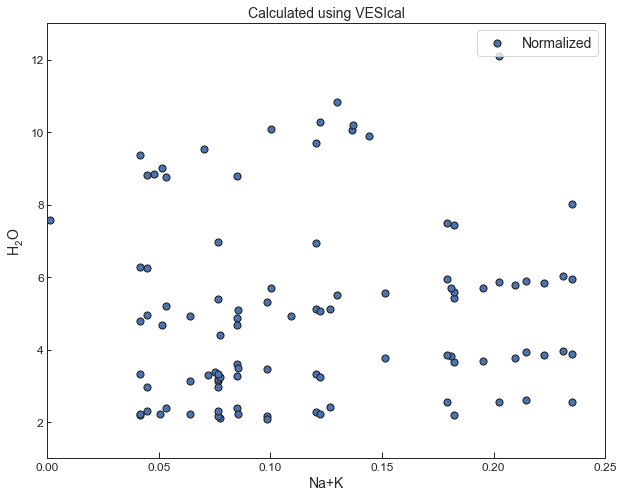

In [11]:
fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.xlim([0, 0.25])
plt.ylim([1, 13])
plt.title('Calculated using VESIcal')
plt.scatter(Normdata['Na2Onorm']+Normdata['K2Onorm'], Normdata['H2O'], edgecolor='k', facecolor='b', s=50, label='Normalized')
plt.xlabel('Na+K')
plt.ylabel('H$_2$O')
plt.legend()

# Their graph below

![AtomicProportions.PNG](Testing_Shishkina_img1.png)